In [60]:
!pip install japanize-matplotlib

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from wordcloud import WordCloud

In [62]:
df = pd.read_csv(r"C:\Users\sk062\OneDrive\デスクトップ\西新宿 自動運転アンケート2025.2.21~24.csv　108名バージョン\西新宿 自動運転アンケート2025.2.21~24.csv")
df_copy = df.copy()
df_copy.columns = [
    "timestamp", "Q1-1_attribute_Sex", "Q1-1_attribute_Age", "Q1-2_position", "Q1-3_region",
    "Q1-4_past_autonomous_bus", "Q2-1_reuse_intent", "Q2-2_reason_reuse", "Q2-2_reason_no_reuse",
    "Q2-3_usage_frequency", "Q3-1_fare_willingness", "Q4-1_safety_concern", "Q4-2_safety_situation",
    "Q5-1_participation_reason", "Q5-2_info_source", "Q5-3_riding_comfort", "Q5-3_comfort_reason",
    "Q5-4_expectation_future", "Q5-4_expectation_reason",
    "Q6-1-a_beneficiary_parking", "Q6-1-b_non_beneficiary_parking",
    "Q6-2-a_beneficiary_pedestrian", "Q6-2-b_non_beneficiary_pedestrian",
    "Q6-3-a_beneficiary_speed_adjust", "Q6-3-b_non_beneficiary_speed_adjust",
    "Q6-4-a_beneficiary_financial_burden", "Q6-4-b_non_beneficiary_financial_burden",
    "Q7-1_self_service_acceptance"
]

df_copy.iloc[:, 6] = df_copy.iloc[:, 6].replace('①希望する', 1)
df_copy.iloc[:, 6] = df_copy.iloc[:, 6].replace('②どちらかというと希望する', 2)
df_copy.iloc[:, 6] = df_copy.iloc[:, 6].replace('③どちらかというと希望しない', 3)
df_copy.iloc[:, 6] = df_copy.iloc[:, 6].replace('④希望しない', 4)

df_copy.iloc[:, 9] = df_copy.iloc[:, 9].replace('①週５回以上', 1)
df_copy.iloc[:, 9] = df_copy.iloc[:, 9].replace('②週３～４回', 2)
df_copy.iloc[:, 9] = df_copy.iloc[:, 9].replace('③週１～２回', 3)
df_copy.iloc[:, 9] = df_copy.iloc[:, 9].replace('④月に１～３回', 4)
df_copy.iloc[:, 9] = df_copy.iloc[:, 9].replace('⑤年に数回以下', 5)

df_copy.iloc[:, 10] = df_copy.iloc[:, 10].replace('①１００円以下', 1)
df_copy.iloc[:, 10] = df_copy.iloc[:, 10].replace('②１５０円', 2)
df_copy.iloc[:, 10] = df_copy.iloc[:, 10].replace('③２００円', 3)
df_copy.iloc[:, 10] = df_copy.iloc[:, 10].replace('④２５０円', 4)
df_copy.iloc[:, 10] = df_copy.iloc[:, 10].replace('⑤３００円', 5)

df_copy.iloc[:, 11] = df_copy.iloc[:, 11].replace('①危険を感じた', 1)
df_copy.iloc[:, 11] = df_copy.iloc[:, 11].replace('②危険を感じなかった', 2)

df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('①興味本位', 1)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('②家族・友人に誘われたから', 2)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('③試しに乗ってみた（視察含む）', 3)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑤自動運動システムに興味があった', 5)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑥通勤（都庁）', 6)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑦通勤（都庁以外）', 7)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑧業務', 8)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑨趣味・コミュニティ活動', 9)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑩通院/健康関係', 10)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑪行政機関利用', 11)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑫金融/郵便関係利用', 12)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑬外食', 13)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑭日用品の購入', 14)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑮（日用品を除く）物品の購入/サービス契約', 15)
df_copy.iloc[:, 13] = df_copy.iloc[:, 13].replace('⑯仕事以外の方（知人/友人/家族等）の面会', 16)

df_copy.iloc[:, 19] = df_copy.iloc[:, 19].replace('①全面的に協力できる', 1)
df_copy.iloc[:, 19] = df_copy.iloc[:, 19].replace('②やや協力できる', 2)
df_copy.iloc[:, 19] = df_copy.iloc[:, 19].replace('③普通', 3)
df_copy.iloc[:, 19] = df_copy.iloc[:, 19].replace('④やや協力できない', 4)
df_copy.iloc[:, 19] = df_copy.iloc[:, 19].replace('⑤全面的に協力できない', 5)

df_copy.iloc[:, 20] = df_copy.iloc[:, 20].replace('①全面的に協力できる', 1)
df_copy.iloc[:, 20] = df_copy.iloc[:, 20].replace('②やや協力できる', 2)
df_copy.iloc[:, 20] = df_copy.iloc[:, 20].replace('③普通', 3)
df_copy.iloc[:, 20] = df_copy.iloc[:, 20].replace('④やや協力できない', 4)
df_copy.iloc[:, 20] = df_copy.iloc[:, 20].replace('⑤全面的に協力できない', 5)

df_copy.iloc[:, 21] = df_copy.iloc[:, 21].replace('①全面的に協力できる', 1)
df_copy.iloc[:, 21] = df_copy.iloc[:, 21].replace('②やや協力できる', 2)
df_copy.iloc[:, 21] = df_copy.iloc[:, 21].replace('③普通', 3)
df_copy.iloc[:, 21] = df_copy.iloc[:, 21].replace('④やや協力できない', 4)
df_copy.iloc[:, 21] = df_copy.iloc[:, 21].replace('⑤全面的に協力できない', 5)

df_copy.iloc[:, 22] = df_copy.iloc[:, 22].replace('①全面的に協力できる', 1)
df_copy.iloc[:, 22] = df_copy.iloc[:, 22].replace('②やや協力できる', 2)
df_copy.iloc[:, 22] = df_copy.iloc[:, 22].replace('③普通', 3)
df_copy.iloc[:, 22] = df_copy.iloc[:, 22].replace('④やや協力できない', 4)
df_copy.iloc[:, 22] = df_copy.iloc[:, 22].replace('⑤全面的に協力できない', 5)

df_copy.iloc[:, 23] = df_copy.iloc[:, 23].replace('①全面的に協力できる', 1)
df_copy.iloc[:, 23] = df_copy.iloc[:, 23].replace('②やや協力できる', 2)
df_copy.iloc[:, 23] = df_copy.iloc[:, 23].replace('③普通', 3)
df_copy.iloc[:, 23] = df_copy.iloc[:, 23].replace('④やや協力できない', 4)
df_copy.iloc[:, 23] = df_copy.iloc[:, 23].replace('⑤全面的に協力できない', 5)

df_copy.iloc[:, 24] = df_copy.iloc[:, 24].replace('①全面的に協力できる', 1)
df_copy.iloc[:, 24] = df_copy.iloc[:, 24].replace('②やや協力できる', 2)
df_copy.iloc[:, 24] = df_copy.iloc[:, 24].replace('③普通', 3)
df_copy.iloc[:, 24] = df_copy.iloc[:, 24].replace('④やや協力できない', 4)
df_copy.iloc[:, 24] = df_copy.iloc[:, 24].replace('⑤全面的に協力できない', 5)

df_copy.iloc[:, 25] = df_copy.iloc[:, 25].replace('①全面的に協力できる', 1)
df_copy.iloc[:, 25] = df_copy.iloc[:, 25].replace('②やや協力できる', 2)
df_copy.iloc[:, 25] = df_copy.iloc[:, 25].replace('③普通', 3)
df_copy.iloc[:, 25] = df_copy.iloc[:, 25].replace('④やや協力できない', 4)
df_copy.iloc[:, 25] = df_copy.iloc[:, 25].replace('⑤全面的に協力できない', 5)

df_copy.iloc[:, 26] = df_copy.iloc[:, 26].replace('①全面的に協力できる', 1)
df_copy.iloc[:, 26] = df_copy.iloc[:, 26].replace('②やや協力できる', 2)
df_copy.iloc[:, 26] = df_copy.iloc[:, 26].replace('③普通', 3)
df_copy.iloc[:, 26] = df_copy.iloc[:, 26].replace('④やや協力できない', 4)
df_copy.iloc[:, 26] = df_copy.iloc[:, 26].replace('⑤全面的に協力できない', 5)

df_copy = df_copy.fillna(0)

C:\Users\sk062\AppData\Local\Temp\ipykernel_2200\1874308237.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy.iloc[:, 6] = df_copy.iloc[:, 6].replace('④希望しない', 4)
C:\Users\sk062\AppData\Local\Temp\ipykernel_2200\1874308237.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy.iloc[:, 9] = df_copy.iloc[:, 9].replace('⑤年に数回以下', 5)
C:\Users\sk062\AppData\Local\Temp\ipykernel_2200\1874308237.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the ol

In [63]:
df_copy.head()

,timestamp,Q1-1_attribute_Sex,Q1-1_attribute_Age,Q1-2_position,Q1-3_region,Q1-4_past_autonomous_bus,Q2-1_reuse_intent,Q2-2_reason_reuse,Q2-2_reason_no_reuse,Q2-3_usage_frequency,...,Q5-4_expectation_reason,Q6-1-a_beneficiary_parking,Q6-1-b_non_beneficiary_parking,Q6-2-a_beneficiary_pedestrian,Q6-2-b_non_beneficiary_pedestrian,Q6-3-a_beneficiary_speed_adjust,Q6-3-b_non_beneficiary_speed_adjust,Q6-4-a_beneficiary_financial_burden,Q6-4-b_non_beneficiary_financial_burden,Q7-1_self_service_acceptance
0,2025/02/21 12:49:00 午後 GMT+9,男性,40代,関係者,神奈川県,初めて参加した,4.0,0,大半が手動運転だった。,0.0,...,0,2,2,4,4,4,4,3,3,②緊急時の通報;③車内の温度調節や窓の開閉;④行先や経路の確認（質問できない）;⑤扉の開閉;...
1,2025/02/21 1:39:50 午後 GMT+9,男性,30代,関係者,その他,初めて参加した,4.0,0,実証化には時間がかかるように感じた。,0.0,...,運転士不足への補完,3,4,3,5,3,5,5,5,②緊急時の通報;③車内の温度調節や窓の開閉;⑤扉の開閉;⑥チャージ含めた完全キャッシュレス
2,2025/02/21 1:43:16 午後 GMT+9,男性,50代,関係者,東京都（23区以外）,初めて参加した,1.0,③希望する停留所がある,0,1.0,...,0,1,1,1,1,1,1,2,3,②緊急時の通報;③車内の温度調節や窓の開閉;⑥チャージ含めた完全キャッシュレス
3,2025/02/21 1:45:08 午後 GMT+9,男性,40代,関係者,23区（新宿区以外）,初めて参加した,2.0,④他の交通手段より便利/早い,0,5.0,...,0,3,3,3,3,3,3,3,3,④行先や経路の確認（質問できない）
4,2025/02/21 1:54:50 午後 GMT+9,男性,40代,関係者,23区（新宿区以外）,初めて参加した,3.0,0,⑤他の交通手段の方が便利/早い,0.0,...,0,3,4,2,4,2,4,2,4,③車内の温度調節や窓の開閉;④行先や経路の確認（質問できない）;⑥チャージ含めた完全キャッシュレス


In [64]:
# 再度の利用を希望する場合の理由と再度の利用を希望する場合の理由を比較する。
reuse_reasen = df.iloc[:,7] #再度の利用を希望する場合の理由
reuse_not_reasen = df.iloc[:,8] #再度の利用を希望しない場合の理由

In [65]:
# 欠損値の削除
reuse_reasen_not_zero = reuse_reasen.dropna()
reuse_not_reasen_not_zero = reuse_not_reasen.dropna()

In [66]:
# list化する
reuse_reasen_not_zero_list = reuse_reasen_not_zero.tolist()
reuse_not_reasen_not_zero_list = reuse_not_reasen_not_zero.tolist()

In [67]:
# list化したうえで複数回答を離す。
reuse_reasen_not_zero_list_simple = [item.split(";") for item in reuse_reasen_not_zero_list]
reuse_not_reasen_not_zero_list_simple = [item.split(";") for item in reuse_not_reasen_not_zero_list]

# list内の各要素を個別に分ける
reuse_reasen_not_zero_list_simple = [item for sublist in reuse_reasen_not_zero_list_simple for item in sublist]
reuse_not_reasen_not_zero_list_simple = [item for sublist in reuse_not_reasen_not_zero_list_simple for item in sublist]

In [68]:
print(reuse_reasen_not_zero_list_simple)
print("-----------------------------------------------------------------------------")
print(reuse_not_reasen_not_zero_list_simple)

['③希望する停留所がある', '④他の交通手段より便利/早い', '①安全性を感じる', '②乗り方が簡単(予約等)', '②乗り方が簡単(予約等)', '③希望する停留所がある', '④他の交通手段より便利/早い', '①安全性を感じる', '技術の進展を見届けたいから', '③希望する停留所がある', '③希望する停留所がある', '③希望する停留所がある', '①安全性を感じる', '①安全性を感じる', '②乗り方が簡単(予約等)', '④他の交通手段より便利/早い', '①安全性を感じる', '③希望する停留所がある', '④他の交通手段より便利/早い', 'レベルが上がったらまた試乗してみたい', '乗っていてワクワクする', 'どの程度、進化されたかを感じてみたいです', '精度が高まって実用化に近づくのを実感したい', '①安全性を感じる', 'おもしろい。', '②乗り方が簡単(予約等)', '③希望する停留所がある', '⑤運行時間帯が適切', '④他の交通手段より便利/早い', '今後の自動運転技術の向上を期待しているから。', '⑤運行時間帯が適切', '①安全性を感じる', '②乗り方が簡単(予約等)', '自動運転が興味深い', '②乗り方が簡単(予約等)', '①安全性を感じる', '①安全性を感じる', '②乗り方が簡単(予約等)', '②乗り方が簡単(予約等)', '①安全性を感じる', '昨年も乗らせていただいたが徐々に良くなっていると感じている。先が楽しみ', '①安全性を感じる', '自動運転技術進歩のため利用することで需要があることを示したいです', '③希望する停留所がある', '④他の交通手段より便利/早い', '⑤運行時間帯が適切', '①安全性を感じる', '①安全性を感じる', '④他の交通手段より便利/早い', '予約無し希望', '自動運転バスの再乗車による評価', '①安全性を感じる', '①安全性を感じる', '①安全性を感じる', '③希望する停留所がある', '③希望する停留所がある', '①安全性を感じる', '③希望する停留所がある', '技術の進歩を感じて面白い', '①安全性を感じる', '②乗り方が簡単(予約等)', 'システムの解説が面白かったが、後部座席であったためモニターの表示を詳細に

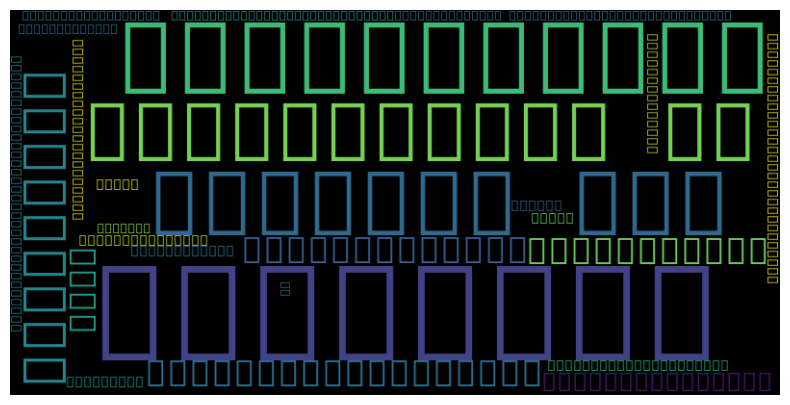

In [69]:
# 再度利用する理由をwordcloudする
reuse_reasen_not_zero_list_simple =  " ".join(reuse_reasen_not_zero_list_simple)
wordcloud = WordCloud(width=800, height=400).generate(reuse_reasen_not_zero_list_simple)
# 可視化
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()